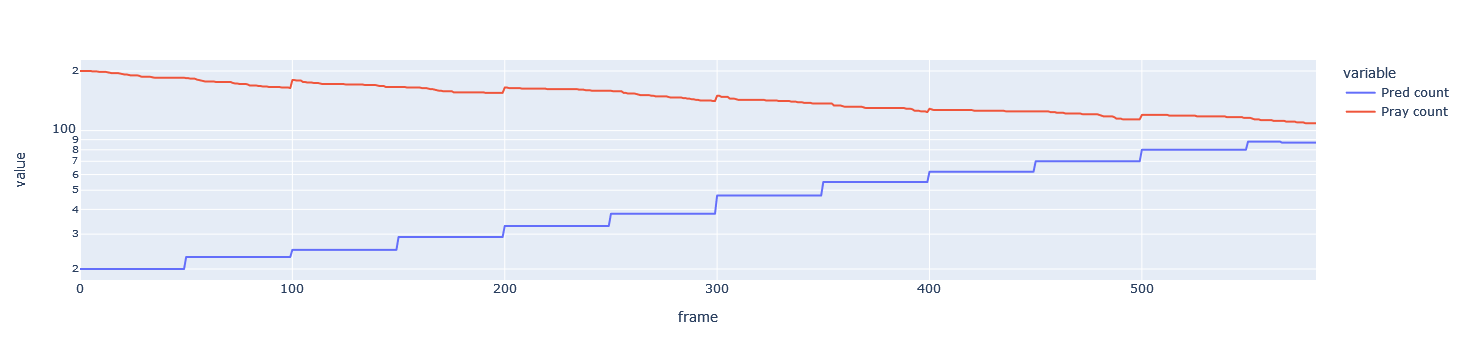

In [4]:
import polars as pl
import os
import plotly.express as px

df = pl.read_csv("data.csv")

df.groupby(["frame", "kind"], maintain_order=True).count()

clean = df.groupby("frame", maintain_order=True).agg(
    [
        pl.col("kind").filter(pl.col("kind") == "Pred").count().alias("Pred count"),
        pl.col("kind").filter(pl.col("kind") == "Pray").count().alias("Pray count"),
    ]
)

file_name = "Population.csv"

if not os.path.exists(file_name):
    with open(file_name, "w"):
        pass

clean.write_csv(file_name, separator=",")

px.line(clean.to_pandas(), x="frame", y=["Pred count", "Pray count"], log_y = True)

In [5]:
print(clean)

shape: (583, 3)
┌───────┬────────────┬────────────┐
│ frame ┆ Pred count ┆ Pray count │
│ ---   ┆ ---        ┆ ---        │
│ i64   ┆ u32        ┆ u32        │
╞═══════╪════════════╪════════════╡
│ 0     ┆ 20         ┆ 200        │
│ 1     ┆ 20         ┆ 200        │
│ 2     ┆ 20         ┆ 200        │
│ 3     ┆ 20         ┆ 200        │
│ …     ┆ …          ┆ …          │
│ 579   ┆ 87         ┆ 109        │
│ 580   ┆ 87         ┆ 109        │
│ 581   ┆ 87         ┆ 109        │
│ 582   ┆ 87         ┆ 109        │
└───────┴────────────┴────────────┘


In [6]:
print(clean.mean())

shape: (1, 3)
┌───────┬────────────┬────────────┐
│ frame ┆ Pred count ┆ Pray count │
│ ---   ┆ ---        ┆ ---        │
│ f64   ┆ f64        ┆ f64        │
╞═══════╪════════════╪════════════╡
│ 291.0 ┆ 46.28988   ┆ 147.281304 │
└───────┴────────────┴────────────┘
